# Stochastic processes

- Create stochastic process , analyse , plot and extract statistics
- Compute the autocorrelation for the signal
- Compute the correlation between two signals
- Is it stationary process ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib.helpersmd import getRandomND,getMyRandom   # procedures to generate random signal
from lib.statsmd import autocorr,crosscorr 
from lib.statsmd import Rxx,Rxy
from lib.statsmd import getStatistics,printStatsReport,splittedDomainStats  
from lib.plotmd import saveFigure
from lib.plotmd import plotVector,plotHistogram,plotDistribution
%matplotlib notebook
TUT_NUM="03"
FIG_COUNT=0

In [2]:
def plotDeviation(xmean,s,mxv,fignum):
    import matplotlib.pyplot as pl
    xs=[]
    for i in range(-3,4):
        xs.append([xmean-i*s,xmean-i*s])
    y=[0,mxv]
    for x in xs:
        plt.plot(x,y)    
def plotComp(comdata,desc="1"):
    import matplotlib.pyplot as plt
    k=1
    n=330
    for col in comdata[0].keys():
        v=[st[col] for st in comdata]
        plt.subplot(n+k)
        plt.grid()
        plotVector(v,col,"parts",col)
        k=k+1
    plt.suptitle(desc)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)


### Create a stochastic signal , analyse it and extract statistics

{$X_k$} random with $k=0,1,2,..,N-1$

$C_3;  \overline{X} = (\sum_{k=0}^{N-1}X_k) \div N$

$C_k; Y^2 = (\sum_{k=0}^{N-1}X_k^2) \div N$

$Ck0; E=\sqrt{Y^2}$

$D= (\sum_{k=0}^{N-1}(X_k-\overline{X})^2) \div N$

$co; \delta=\sqrt{D}$

$M_3=(\sum_{k=0}^{N-1} (X_k-\overline{X})^3)\div N$ ; $\gamma_1=M_3\div \delta^3$

$M_4=(\sum_{k=0}^{N-1} (X_k-\overline{X})^4)\div N$ ; $\gamma_2=M_4\div \delta^4$

In [3]:
N=1000
X=getRandomND(N)   # Normal Distribution
stats=getStatistics(X)
printStatsReport(stats)

xmean=-0.010480
ck=0.961421
ck0=0.980521
D=0.961312
c0=0.980465
M3=-0.100350
gama1=-0.106469
M4=3.036076
gama2=0.285370


Plot 
- The previous stochastic signal
- Histogram
- Distribution

<IPython.core.display.Javascript object>


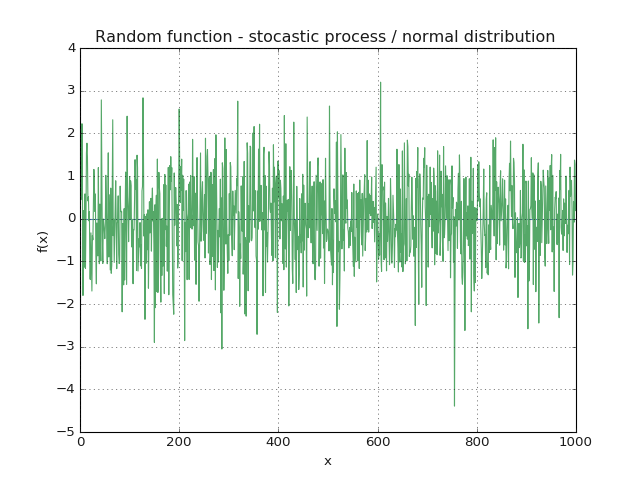

<IPython.core.display.Javascript object>


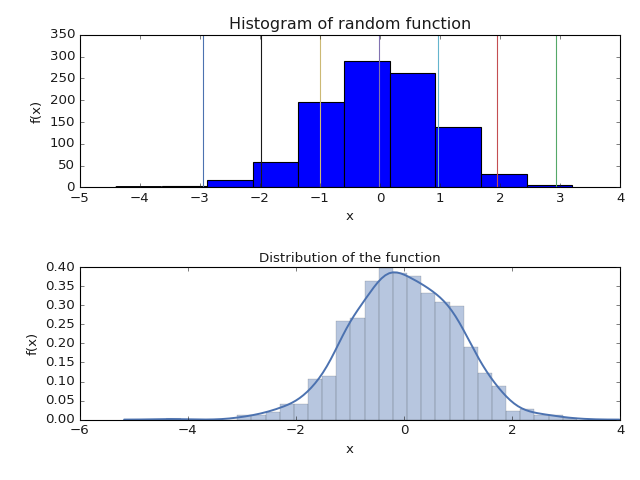

In [4]:
plt.figure(1)
plotVector(X,"Random function - stocastic process / normal distribution ",showMean=True)
_,FIG_COUNT=saveFigure("Random function - stocastic process",TUT_NUM,FIG_COUNT),FIG_COUNT+1
plt.figure(2)
plt.subplot(211)
plotHistogram(X,"Histogram of random function")
plotDeviation(stats["mean"],stats["co"],350,"Histogram of random function")
_,FIG_COUNT=saveFigure("Histogram of random function",TUT_NUM,FIG_COUNT),FIG_COUNT+1
plt.subplot(212)
plotDistribution(X,"Distribution of the function")
_,FIG_COUNT=saveFigure("Distribution of the function",TUT_NUM,FIG_COUNT),FIG_COUNT+1
plt.tight_layout()
plt.show()

<B>Autocorrelation</B>, also known as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of delay. Informally, it is the similarity between observations as a function of the time lag between them.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Comparison_convolution_correlation.svg/600px-Comparison_convolution_correlation.svg.png">

### Compute the autocorrelation of the signal

N : length of the signal

$R_{xx}(l)=\sum_{k=0}^{k-l-1}((x_k-\overline x)(x_{k+l}-\overline x)) \div (N-l)$ ; l=0,1,2,...,N-1

* Compare my implementation with built-in function in numpy module

<IPython.core.display.Javascript object>


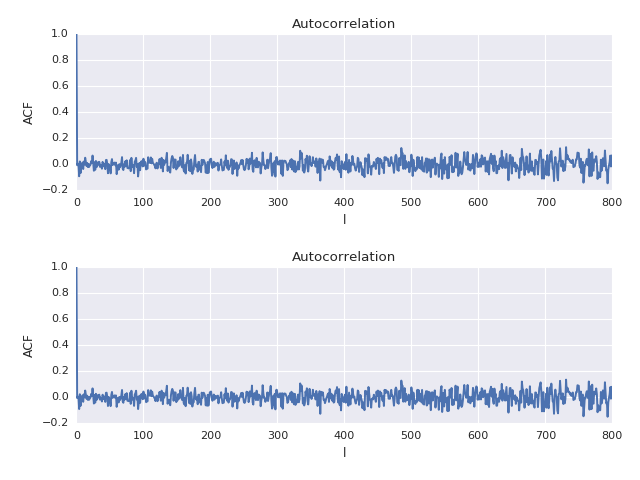

In [5]:
L=800
rxxs1=Rxx(X,L)
rxxs2=autocorr(X,L)
plt.figure(4)
plt.subplot(211)
plotVector(rxxs1,"Autocorrelation",xlabel="l",ylabel="ACF")
plt.grid()
plt.subplot(212)
plotVector(rxxs2,"Autocorrelation",xlabel="l",ylabel="ACF")
_,FIG_COUNT=saveFigure("Autocorrelation",TUT_NUM,FIG_COUNT),FIG_COUNT+1
plt.grid()
plt.tight_layout()
plt.show()

In signal processing, <B>cross-correlation</B> is a measure of similarity of two series as a function of the displacement of one relative to the other. This is also known as a sliding dot product or sliding inner-product.

### Compute the correlation between two signals

N : length of the signal

$R_{xy}(l)=\sum_{k=0}^{k-l-1}((x_k-\overline x)(y_{k+l}-\overline y)) \div (N-l)$ ; l=0,1,2,...,N-1

* Compare my implementation with built-in function in numpy module

<IPython.core.display.Javascript object>


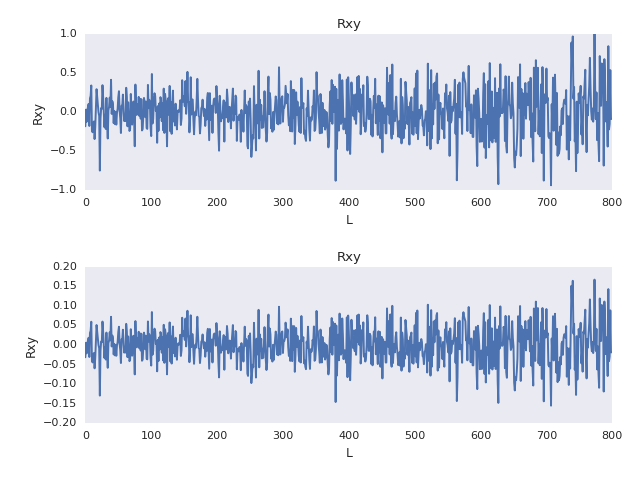

In [6]:
Y=getRandomND(N)
assert Y.shape==X.shape

rxys1=Rxy(X,Y,L)
rxys2=crosscorr(X,Y,L)
plt.figure(5)
plt.subplot(211)
plotVector(rxys1,"Rxy","L","Rxy")
plt.subplot(212)
plotVector(rxys2,"Rxy","L","Rxy")
_,FIG_COUNT=saveFigure("Rxy",TUT_NUM,FIG_COUNT),FIG_COUNT+1
plt.tight_layout()
plt.show()

### Is it stationary process ?

<IPython.core.display.Javascript object>


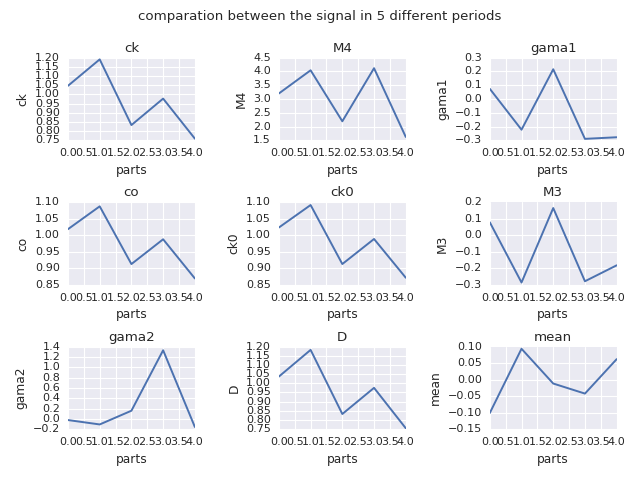

In [7]:
ret=splittedDomainStats(X,5)
plt.figure(6,figsize=(8, 6), dpi=80)
plotComp(ret,"comparation between the signal in 5 different periods")
_,FIG_COUNT=saveFigure("comparation between the signal in 5 different periods",TUT_NUM,FIG_COUNT),FIG_COUNT+1
plt.show()